In [2]:
import pandas as pd
sales=pd.Series([100,300,250,200])
high=sales>200
print(sales[high])

1    300
2    250
dtype: int64


In [5]:
wd=pd.read_csv('world.csv')
print(wd.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187885 entries, 0 to 187884
Data columns (total 33 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              187885 non-null  int64  
 1   iso_code        187885 non-null  object 
 2   洲名              187885 non-null  object 
 3   國家              187885 non-null  object 
 4   日期              187885 non-null  object 
 5   總確診數            187885 non-null  int64  
 6   新增確診數           187885 non-null  int64  
 7   七天移動平均新增確診數     187885 non-null  float64
 8   總死亡數            187885 non-null  int64  
 9   新增死亡數           187885 non-null  int64  
 10  七天移動平均新增死亡數     187885 non-null  float64
 11  每百萬人確診數         187885 non-null  float64
 12  每百萬人死亡數         187885 non-null  float64
 13  傳染率             187885 non-null  float64
 14  新增檢驗件數          187885 non-null  int64  
 15  總檢驗件數           187885 non-null  int64  
 16  每千人檢驗件數         187885 non-null  float64
 17  七天移動平均新增檢驗

In [9]:
wd1=wd.reindex(columns=['洲名','國家','日期','總確診數','新增確診數','總人口數','解封指數'])
mask=wd1['國家']=='台灣'
tw=wd1[mask]
tw

,洲名,國家,日期,總確診數,新增確診數,總人口數,解封指數
163986,亞洲,台灣,2020-01-16,0,0,23855008,99999.00
163987,亞洲,台灣,2020-01-17,0,0,23855008,99999.00
163988,亞洲,台灣,2020-01-18,0,0,23855008,99999.00
163989,亞洲,台灣,2020-01-19,0,0,23855008,99999.00
163990,亞洲,台灣,2020-01-20,0,0,23855008,99999.00
...,...,...,...,...,...,...,...
164884,亞洲,台灣,2022-07-02,3837856,34807,23855008,258.17
164885,亞洲,台灣,2022-07-03,3870528,32672,23855008,260.37
164886,亞洲,台灣,2022-07-04,3893643,23115,23855008,261.94
164887,亞洲,台灣,2022-07-05,3929627,35984,23855008,264.37


In [11]:
tw1=wd1.query("國家=='台灣' and 新增確診數==0")
tw1

,洲名,國家,日期,總確診數,新增確診數,總人口數,解封指數
163986,亞洲,台灣,2020-01-16,0,0,23855008,99999.00
163987,亞洲,台灣,2020-01-17,0,0,23855008,99999.00
163988,亞洲,台灣,2020-01-18,0,0,23855008,99999.00
163989,亞洲,台灣,2020-01-19,0,0,23855008,99999.00
163990,亞洲,台灣,2020-01-20,0,0,23855008,99999.00
...,...,...,...,...,...,...,...
164627,亞洲,台灣,2021-10-18,16337,0,23855008,0.16
164823,亞洲,台灣,2022-05-02,132955,0,23855008,8.02
164828,亞洲,台灣,2022-05-07,268569,0,23855008,17.16
164829,亞洲,台灣,2022-05-08,268569,0,23855008,17.16


In [ ]:
tw_max=tw['新增確診數'].max()
tw.query("新增確診數==@tw_max")
tw.query("日期>='2022-01-01' and 日期<='2022-01-31'")

In [22]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'col1': ['A', 'A', 'B', np.nan, 'D', 'C'],
                   'col2': [2, 1, 9, 8, 7, 4],
                   'col3': [0, 1, 9, 4, 2, 3]})
print(df)
print(df.sort_values(by='col1'))  # 按 col1 升序，NaN 置後
print(df.sort_values(by=['col1', 'col2'], ascending=[False, True]))  # 多欄位混合排序

  col1  col2  col3
0    A     2     0
1    A     1     1
2    B     9     9
3  NaN     8     4
4    D     7     2
5    C     4     3
  col1  col2  col3
0    A     2     0
1    A     1     1
2    B     9     9
5    C     4     3
4    D     7     2
3  NaN     8     4
  col1  col2  col3
4    D     7     2
5    C     4     3
2    B     9     9
1    A     1     1
0    A     2     0
3  NaN     8     4


In [ ]:
# 排名範例
import pandas as pd
import numpy as np

df = pd.DataFrame({'math': [90, 80, 80, 70], 'english': [88, 90, 85, 70]})
print(df.rank())  # 預設按列平均排名
#   math  english
# 0  4.0     2.0
# 1  2.5     3.5
# 2  2.5     1.0
# 3  1.0     3.5

print(df.rank(method='min', ascending=False))  # 最小排名、降序、百分比

In [33]:
#建立學生成績表
import pandas as pd
import numpy as np
#建立50位學生的5科成績
np.random.seed(60)
scores = np.random.randint(50, 101, size=(50, 5))
df_scores = pd.DataFrame(scores, columns=['國文', '英文', '數學', '自然', '社會'])
df_scores.columns.name='科目'
df_scores.index.name='學生編號'
sum=df_scores.sum(axis=1)#總分只算一次
mean=df_scores.mean(axis=1)
df_scores['總分']=sum
df_scores['平均']=mean
df_scores['班排名']=df_scores['總分'].rank(method='min', ascending=False)
df_scores1=df_scores.sort_values(by='班排名')
df_scores1


科目,國文,英文,數學,自然,社會,總分,平均,班排名
學生編號,,,,,,,,
2,73,92,90,94,84,433,86.6,1.0
5,82,93,72,95,88,430,86.0,2.0
32,88,89,62,100,88,427,85.4,3.0
36,92,76,80,85,89,422,84.4,4.0
3,90,53,94,100,82,419,83.8,5.0
39,65,92,76,90,96,419,83.8,5.0
19,89,88,97,67,74,415,83.0,7.0
20,99,52,94,90,75,410,82.0,8.0
10,68,96,61,100,82,407,81.4,9.0


In [34]:
import pandas as pd
s = pd.Series([20, 21, 12], index=['London', 'New York', 'Helsinki'])
s.apply(lambda x: x ** 2)

London      400
New York    441
Helsinki    144
dtype: int64

In [35]:
def add_value(x, a, b=1):
    return x + a + b
    
s.apply(add_value, args=(10,), b=5)

London      35
New York    36
Helsinki    27
dtype: int64

In [38]:
df=pd.DataFrame({'A':[1,2,3],'B':[4,5,6]})
print(df)
def my_f(row):
    return row['A'] + row['B']
df.apply(my_f, axis=1)  # axis=1 表示按行應用


   A  B
0  1  4
1  2  5
2  3  6


0    5
1    7
2    9
dtype: int64

In [43]:
def cal1(series):
    # 計算最高分、最低分和標準差,只可以小數點後兩位
    return pd.Series([round(series.max(), 2), round(series.min(), 2), round(series.std(), 2)], index=['最高分', '最低分', '標準差'])


df_scores1[['國文', '英文', '數學','自然', '社會']].apply(cal1)  
# 顯示前10名學生的國文、英文、數學成績
import pandas as pd
df_scores1[['國文', '英文', '數學']].head(10)

科目,國文,英文,數學
學生編號,,,
2,73,92,90
5,82,93,72
32,88,89,62
36,92,76,80
3,90,53,94
39,65,92,76
19,89,88,97
20,99,52,94
10,68,96,61


In [44]:
def cal2(series):
    #不及格科目數
    return (series<60).sum()
df_scores1['不及格科目數']=df_scores1[['國文', '英文', '數學','自然', '社會']].apply(cal2, axis=1)
df_scores1

科目,國文,英文,數學,自然,社會,總分,平均,班排名,不及格科目數
學生編號,,,,,,,,,
2,73,92,90,94,84,433,86.6,1.0,0
5,82,93,72,95,88,430,86.0,2.0,0
32,88,89,62,100,88,427,85.4,3.0,0
36,92,76,80,85,89,422,84.4,4.0,0
3,90,53,94,100,82,419,83.8,5.0,1
39,65,92,76,90,96,419,83.8,5.0,0
19,89,88,97,67,74,415,83.0,7.0,0
20,99,52,94,90,75,410,82.0,8.0,1
10,68,96,61,100,82,407,81.4,9.0,0


In [47]:
def cal3(series):
    #傳出不及格的科目名稱
    #如果沒有的話傳出'無'
    subjects=['國文', '英文', '數學','自然', '社會']
    failed_subjects=[]
    for i in range(len(series)):
        if series[i]<60:
            failed_subjects.append(subjects[i])
    if len(failed_subjects)==0:
        return '無'
    return ','.join(failed_subjects)
df_scores1['不及格科目名稱']=df_scores1[['國文', '英文', '數學','自然', '社會']].apply(cal3, axis=1) 
df_scores1

C:\Users\asus\AppData\Local\Temp\ipykernel_36164\3278700748.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if series[i]<60:


科目,國文,英文,數學,自然,社會,總分,平均,班排名,不及格科目數,不及格科目名稱
學生編號,,,,,,,,,,
2,73,92,90,94,84,433,86.6,1.0,0,無
5,82,93,72,95,88,430,86.0,2.0,0,無
32,88,89,62,100,88,427,85.4,3.0,0,無
36,92,76,80,85,89,422,84.4,4.0,0,無
3,90,53,94,100,82,419,83.8,5.0,1,英文
39,65,92,76,90,96,419,83.8,5.0,0,無
19,89,88,97,67,74,415,83.0,7.0,0,無
20,99,52,94,90,75,410,82.0,8.0,1,英文
10,68,96,61,100,82,407,81.4,9.0,0,無


In [48]:
# 說明標準差的觀念
# 使用註解說明標準差的觀念
# 標準差是用來衡量一組數據的分散程度，表示數據點與平均值之間的差異有多大。
# 標準差越大，表示數據點分布得越廣，離平均值較遠；標準差越小，表示數據點較集中，離平均值較近。  
# DataFrame 範例
df = pd.DataFrame({
    '數學': [90, 85, 78, 92, 88],
    '科學': [50, 89, 94, 88, 92]
})
print(df.std())  # 數學: 5.368, 科學: 8.862

數學     5.458938
科學    18.379336
dtype: float64


In [49]:
%pip install wget

import wget
wget.download("https://github.com/roberthsu2003/machine_learning/raw/refs/heads/main/source_data/ChineseFont.ttf")

c:\Users\asus\OneDrive\文件\github\.venv\Scripts\python.exe: No module named pip


Note: you may need to restart the kernel to use updated packages.


'ChineseFont.ttf'

In [50]:
import matplotlib as mpl
from matplotlib.font_manager import fontManager

fontManager.addfont("ChineseFont.ttf")
mpl.rc('font', family="ChineseFont")

In [51]:
#某財務軟體公司在全國有許多代理商，為研究它的財務軟體產品的廣告投入與銷售額的關係，
#統計人員隨機選擇10家代理商進行觀察，搜集到年廣告投入費和月平均銷售額的數據，
#並編製成相關表
#相關係數計算
import pandas as pd
import numpy as np

data = {'年廣告費投入':[12.5, 15.3, 23.2, 26.4, 33.5, 34.4, 39.4, 45.2, 55.4, 60.9],
            '月均銷售額':[21.2, 23.9, 32.9, 34.1, 42.5, 43.2, 49.0, 52.8, 59.4, 63.5]}
data_df = pd.DataFrame(data,index=[2011,2012,2013,2014,2015,2016,2017,2018,2019,2020])
print(data_df)
data_df.corr()  # 計算相關係數

      年廣告費投入  月均銷售額
2011    12.5   21.2
2012    15.3   23.9
2013    23.2   32.9
2014    26.4   34.1
2015    33.5   42.5
2016    34.4   43.2
2017    39.4   49.0
2018    45.2   52.8
2019    55.4   59.4
2020    60.9   63.5


,年廣告費投入,月均銷售額
年廣告費投入,1.000000,0.994198
月均銷售額,0.994198,1.000000


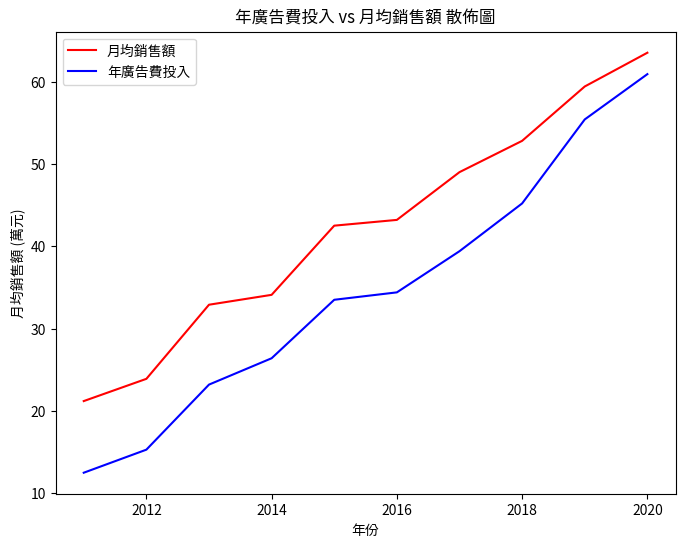

In [55]:
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(8, 6))
axes = figure.add_subplot(1, 1, 1)
# 改變marker顏色 標明兩條線的名字
axes.plot(data_df.index, data_df['月均銷售額'], color='red', label='月均銷售額')
axes.plot(data_df.index, data_df['年廣告費投入'], color='blue', label='年廣告費投入')
axes.set_title('年廣告費投入 vs 月均銷售額 散佈圖')
axes.set_xlabel('年份')
axes.set_ylabel('月均銷售額 (萬元)')
axes.legend()
plt.show()

In [2]:
import yfinance as yf
import ssl
import urllib.request

# 停用 SSL 驗證
ssl._create_default_https_context = ssl._create_unverified_context

ticker = '2330.TW'
start_date = '2024-01-01'
end_date = '2024-06-01'

data = yf.download(ticker, start=start_date, end=end_date, interval='1d', auto_adjust=False)
data

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,2330.TW,2330.TW,2330.TW,2330.TW,2330.TW,2330.TW
Date,,,,,,
2024-01-02,573.747681,593.0,593.0,589.0,590.0,26059058
2024-01-03,559.234680,578.0,585.0,576.0,584.0,37106763
2024-01-04,561.169739,580.0,581.0,577.0,580.0,15309129
2024-01-05,557.299561,576.0,580.0,574.0,578.0,18158971
2024-01-08,564.072388,583.0,585.0,579.0,582.0,17761275
...,...,...,...,...,...,...
2024-05-27,844.713196,869.0,878.0,866.0,872.0,26726954
2024-05-28,840.824951,865.0,873.0,865.0,867.0,25329216
